### Nama: Muhammad Dayutirta Mahara
### NIM: 2241720210
### Kelas: TI - 3E

# **PRAKTIKUM 1**

Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

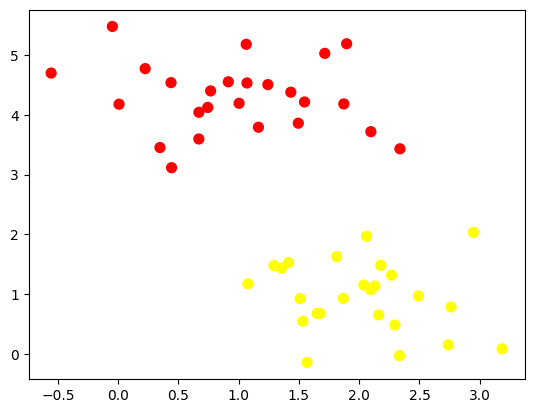

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Kode ini menghasilkan plot sebaran data sintetik yang berisi dua klaster yang berbeda.

---
### Penjelasan:

1. "X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)"
    - X: Data koordinat untuk tiap titik (fitur).
    - y: Label klaster yang sesuai untuk setiap titik (0 atau 1).
    - "n_samples=50": Menghasilkan 50 sampel data.
    - "centers=2": Menghasilkan dua klaster pusat (artinya data akan terdistribusi dalam dua grup).
    - "random_state=0": Menentukan seed untuk pengacakan, sehingga hasilnya konsisten setiap kali kode dijalankan.
    - "cluster_std=0.60": Mengatur standar deviasi atau tingkat sebaran dari tiap klaster. Nilai yang lebih tinggi membuat klaster lebih tersebar.

2. "plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')"
    - plt.scatter(): Fungsi ini digunakan untuk membuat plot scatter (sebaran) data.
    - X[:, 0]: Mengambil nilai pada kolom pertama dari X sebagai koordinat sumbu x.
    - X[:, 1]: Mengambil nilai pada kolom kedua dari X sebagai koordinat sumbu y.
    - c=y: Menggunakan label y untuk memberi warna berbeda ke masing-masing klaster (0 dan 1).
    - s=50: Ukuran titik scatter.
    - cmap='autumn': Skema warna yang digunakan untuk membedakan klaster, diambil dari colormap autumn.
---

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

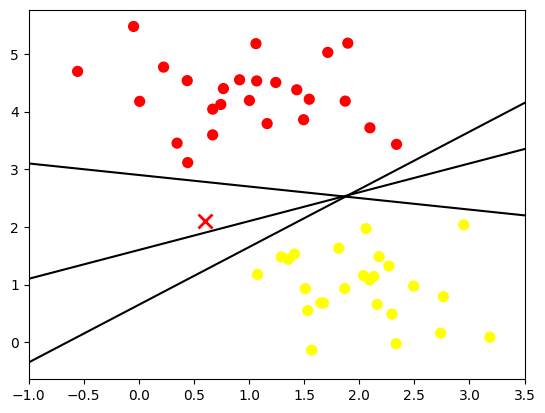

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

# Kode ini menampilkan dataset dalam bentuk plot sebaran,
# menandai satu titik khusus (0.6, 2.1) dengan simbol 'x' merah,
# dan memplot tiga garis lurus dengan berbagai kemiringan dan
# intersep untuk menunjukkan model linear di atas data.

---
### Penjelasan:
1. "xfit = np.linspace(-1, 3.5)"
    - np.linspace(-1, 3.5): Membuat array yang berisi titik-titik yang tersebar secara merata antara -1 dan 3.5. Ini digunakan sebagai sumbu x untuk memplot beberapa garis lurus. Array ini akan memiliki nilai-nilai yang akan dipakai sebagai masukan ke persamaan garis.
2. "plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')"
    - Sama seperti sebelumnya, ini adalah plot sebaran yang menunjukkan titik-titik dari dataset X dengan warna yang berbeda berdasarkan label klaster y, ukuran titik adalah 50, dan menggunakan skema warna autumn.
3. "plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)"
    - plt.plot(): Fungsi ini digunakan untuk memplot simbol pada plot. Dalam hal ini, dipetakan sebuah titik dengan koordinat (0.6, 2.1) menggunakan simbol 'x'.
    - color='red': Warna dari simbol adalah merah.
    - markeredgewidth=2: Lebar tepi simbol adalah 2.
    - markersize=10: Ukuran simbol adalah 10.
    
  Jadi, titik (0.6, 2.1) ditandai dengan simbol 'x' merah pada plot.

4. "for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:"
    - Ini adalah loop yang mengiterasi melalui tiga pasangan nilai m (gradien/kemiringan) dan b (intersep) untuk memplot tiga garis lurus dengan persamaan y = mx + b.
    - Di dalam loop, digunakan "plt.plot(xfit, m * xfit + b, '-k')" untuk memplot garis dengan gradien m dan intersep b.

        - xfit adalah nilai sumbu x (dari np.linspace).
        - m * xfit + b: Persamaan garis yang dihasilkan dengan kemiringan m dan intersep b.
        - '-k': Gaya garis adalah garis lurus dengan warna hitam ('-k' di mana 'k' adalah singkatan untuk warna hitam di matplotlib).
    
  Ini berarti tiga garis akan dipetakan dengan kemiringan dan intersep yang berbeda:
    
    Garis pertama: y = 1x + 0.65
    
    Garis kedua: y = 0.5x + 1.6
    
    Garis ketiga: y = -0.2x + 2.9

    tes
5. "plt.xlim(-1, 3.5)"
    - Ini mengatur batasan sumbu x pada plot, dengan nilai minimum -1 dan maksimum 3.5.
---

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

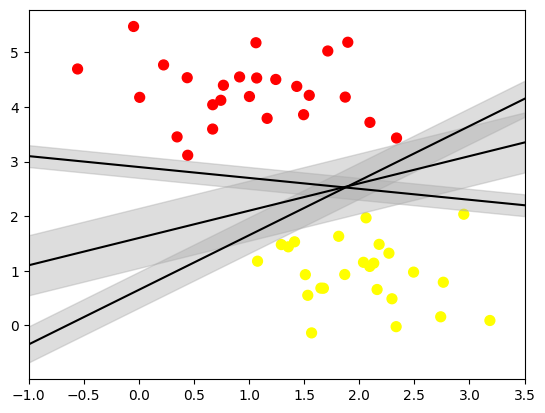

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

# Kode ini memplot dataset klaster sebagai titik-titik,
# menampilkan tiga garis lurus dengan kemiringan dan intersep yang berbeda,
# dan menambahkan area bayangan abu-abu di sekitar setiap garis untuk
# menunjukkan margin atau deviasi ketidakpastian.
# Area yang diisi ini membantu memvisualisasikan batas toleransi di sekitar setiap model linear.


Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

---
### Penjelasan:
  1. "xfit = np.linspace(-1, 3.5)"\
    - np.linspace(-1, 3.5): Membuat array yang berisi titik-titik yang tersebar secara merata antara -1 dan 3.5. Ini digunakan sebagai sumbu x untuk memplot beberapa garis lurus.
  2. "plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')"
    - Ini memplot titik-titik data dari dataset X menggunakan warna yang berbeda berdasarkan label klaster y, dengan ukuran titik 50, dan colormap autumn.
  3. "for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]"
    - Ini adalah loop yang mengiterasi melalui tiga pasangan nilai m (gradien/kemiringan), b (intersep), dan d (nilai deviasi/margin).
      - m: Gradien/kemiringan garis.
      - b: Intersep atau titik di mana garis memotong sumbu y.
      - d: Margin yang akan digunakan untuk membuat area bayangan di sekitar garis.
  4. Loop
    - yfit = m * xfit + b: Menghitung nilai y untuk setiap nilai x pada xfit, menggunakan persamaan garis lurus y = mx + b.
      - m * xfit + b: Persamaan garis lurus dengan kemiringan m dan intersep b.
    - plt.plot(xfit, yfit, '-k'): Memplot garis lurus tersebut dengan warna hitam ('-k').
    - plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4):
      - fill_between(): Mengisi area antara dua garis.
      - xfit: Sumbu x.
      - yfit - d dan yfit + d: Dua batasan pada sumbu y yang akan menciptakan margin di atas dan di bawah garis lurus.
      - edgecolor='none': Tidak ada tepi di area yang diisi.
      - color='#AAAAAA': Warna abu-abu untuk area yang diisi.
      - alpha=0.4: Transparansi area yang diisi (dengan nilai 0.4, sehingga area terlihat semi-transparan).
  
  
  Ini membuat area bayangan abu-abu di sekitar garis lurus untuk menampilkan margin ketidakpastian atau deviasi d di atas dan di bawah garis.
  
  5. plt.xlim(-1, 3.5)
    - Mengatur batasan sumbu x dari -1 hingga 3.5.
---

## Penerapan fitting SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

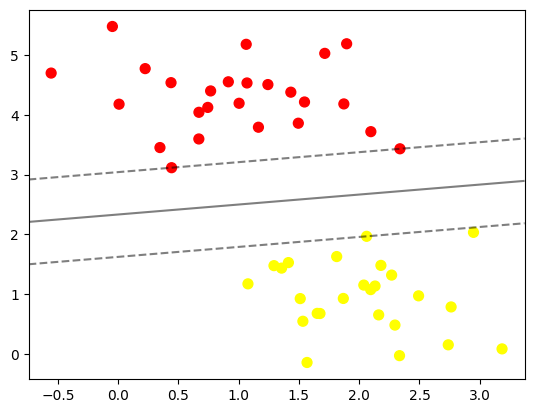

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

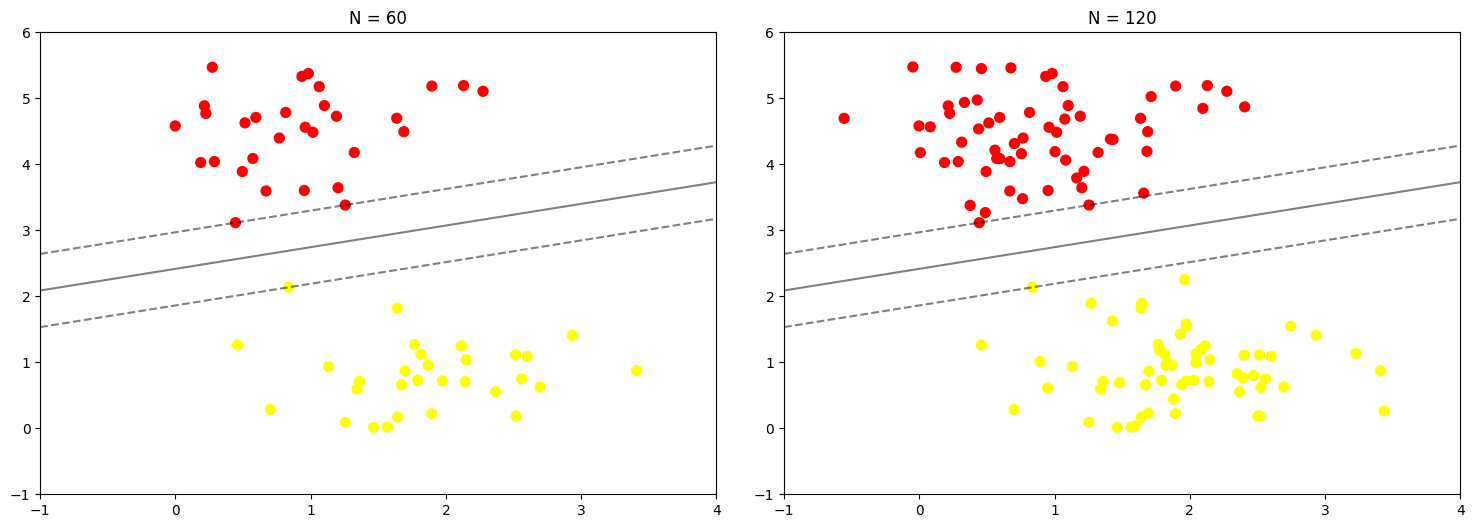

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Data Tidak Terpisah Secara Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

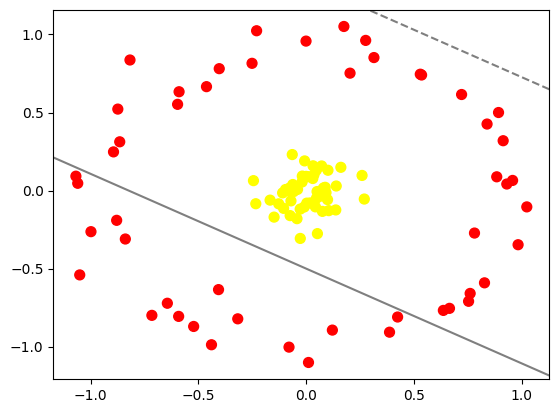

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.38985003e-01,  2.89867633e-02],
       [ 9.15080152e-02, -1.32628926e-02],
       [-1.05952734e+00,  4.64234770e-02],
       [ 3.15488574e-02,  1.58416375e-01],
       [ 6.35726399e-01, -7.68281522e-01],
       [-9.33545438e-03, -1.05475937e-01],
       [ 5.17380833e-02, -2.76141158e-01],
       [ 1.36841699e-01, -1.24445125e-01],
       [-5.83863469e-02, -6.70700967e-03],
       [-4.03438096e-01,  7.80912955e-01],
       [ 9.87515104e-02, -5.83602874e-02],
       [-5.22018624e-01, -8.71142515e-01],
       [ 7.20210483e-01,  6.15310441e-01],
       [-8.38842773e-01, -3.10722406e-01],
       [ 6.43804546e-02, -3.42352434e-03],
       [-2.33958901e-01, -8.46720262e-02],
       [-7.60233705e-03,  1.89836036e-01],
       [ 1.04255887e-01, -1.28916590e-01],
       [-9.98209203e-01, -2.63653666e-01],
       [-1.93812164e-02,  5.47069450e-02],
       [-7.09617412e-02, -6.64332374e-02],
       [-4.06689178e-01, -6.35002659e-01],
       [ 6.39851550e-03,  8.87338539e-02],
       [-2.44809519e-01,  6.33177267e-02],
       [ 8.77664002e-02,  2.06313300e-02],
       [ 3.86119860e-01, -9.07857852e-01],
       [-7.99612874e-02, -1.00366505e+00],
       [ 5.00723793e-02, -6.57437684e-03],
       [-2.82180194e-02, -1.19118616e-01],
       [ 1.60448581e-01,  1.48794361e-01],
       [-5.91610057e-01, -8.06589422e-01],
       [ 4.69463659e-02, -5.02054211e-02],
       [-8.79065187e-01, -1.90949633e-01],
       [-7.15794397e-01, -7.99987433e-01],
       [-6.49703285e-02,  2.30445937e-01],
       [ 2.44179854e-03, -8.07962699e-02],
       [ 4.25130551e-02, -1.04716292e-01],
       [-1.06808071e+00,  9.19015620e-02],
       [-3.17577950e-01, -8.22237808e-01],
       [ 8.26453722e-01, -5.91580110e-01],
       [-8.17320263e-01,  8.36517681e-01],
       [-2.30198746e-01,  1.02393319e+00],
       [ 8.91520568e-01,  4.99933029e-01],
       [ 6.64104546e-01, -7.55041678e-01],
       [ 9.82160357e-01, -3.47337553e-01],
       [ 5.28686019e-01,  7.45396387e-01],
       [ 1.04085587e-02, -1.10197049e+00],
       [-7.10566102e-02, -9.32912878e-03],
       [-1.83966531e-02,  9.26278288e-02],
       [ 2.02972320e-01,  7.52150072e-01],
       [-1.04953571e-01, -1.14241726e-01],
       [ 7.80037236e-01, -2.72554117e-01],
       [ 9.12950210e-01,  3.19151050e-01],
       [ 1.00608491e-01,  1.29965864e-01],
       [ 2.69115092e-01, -5.46025509e-02],
       [-2.77054121e-02, -3.07024121e-01],
       [ 7.49221598e-02, -1.33639972e-01],
       [ 7.59899158e-01, -6.59464176e-01],
       [-8.73666691e-01,  5.21847287e-01],
       [ 4.68138798e-02,  1.30436118e-01],
       [ 7.52634586e-01, -7.09846500e-01],
       [ 3.02299214e-02,  7.70912299e-02],
       [-1.06442883e-03,  9.57585951e-01],
       [-5.89678477e-01,  6.33068362e-01],
       [ 4.23561289e-01, -8.10627318e-01],
       [-4.03723611e-02,  7.29925172e-03],
       [-6.44045854e-01, -7.22428860e-01],
       [ 7.16826752e-02, -3.54085626e-02],
       [-4.39378381e-01, -9.88398583e-01],
       [-9.61526896e-02,  6.40774046e-03],
       [ 3.13861564e-01,  8.52121511e-01],
       [-1.49120419e-01, -1.70484083e-01],
       [ 1.78955511e-02, -7.95439048e-02],
       [ 9.29842265e-01,  4.17275563e-02],
       [-1.27723023e-01, -8.52855937e-02],
       [ 7.12858184e-02,  1.57431458e-01],
       [-7.47097028e-02, -1.60876303e-01],
       [-4.62528010e-01,  6.65636796e-01],
       [-7.70864964e-02,  1.63011868e-02],
       [ 5.34712698e-01,  7.40293658e-01],
       [-1.67689688e-01, -6.15737088e-02],
       [ 1.21088460e-01, -8.94477885e-01],
       [ 8.03427224e-02,  1.66592842e-02],
       [-1.05026473e+00, -5.40732863e-01],
       [ 2.75563124e-01,  9.62084522e-01],
       [-1.09587259e-01, -1.51381619e-02],
       [ 1.02257185e+00, -1.04877893e-01],
       [ 8.83204750e-01,  8.79045728e-02],
       [-6.23720788e-02,  3.85013422e-02],
       [ 1.74520174e-01,  1.05130547e+00],
       [ 8.38310884e-01,  4.26032756e-01],
       [-2.51372720e-01,  8.15228490e-01

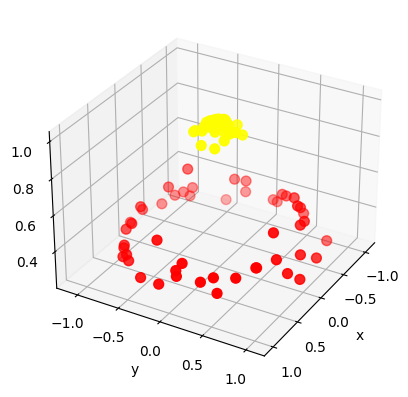

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),X=fixed(X), y=fixed(y))

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

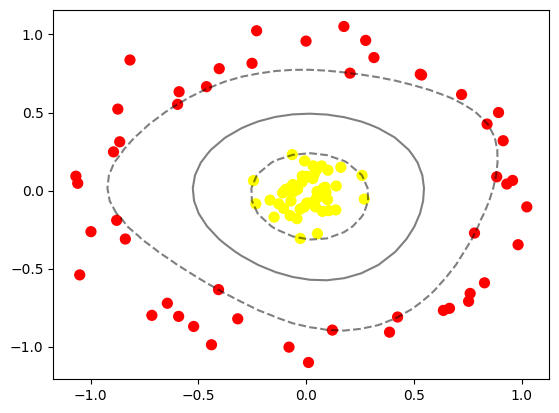

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Data Overlap

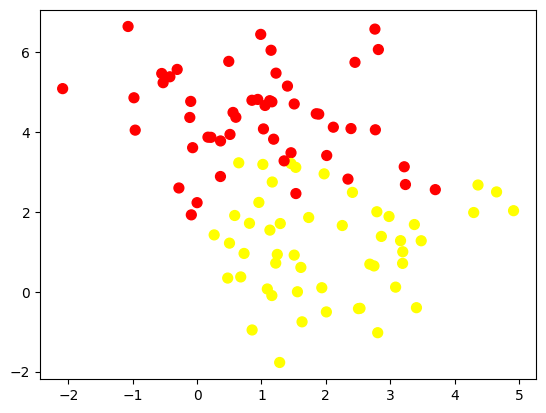

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

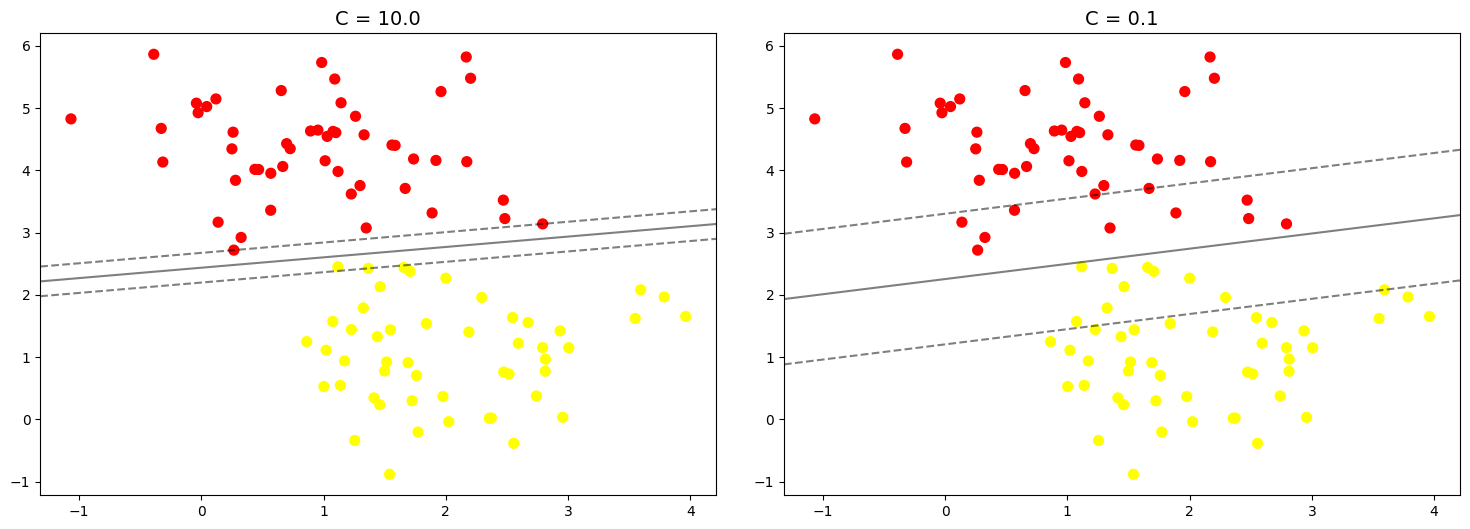

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **PRAKTIKUM 2**

Klasifikasi SVM Pada Data Citra

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


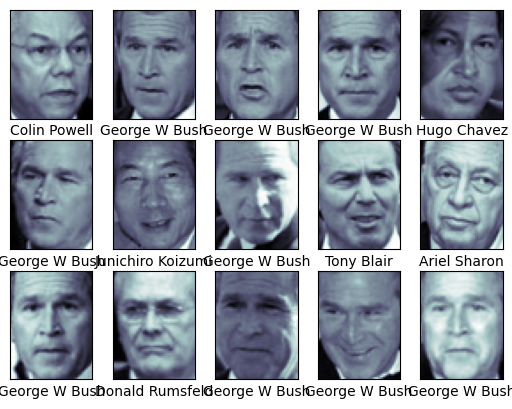

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 39s, sys: 28 s, total: 2min 7s
Wall time: 1min 18s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


prediksi label untuk data testing

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

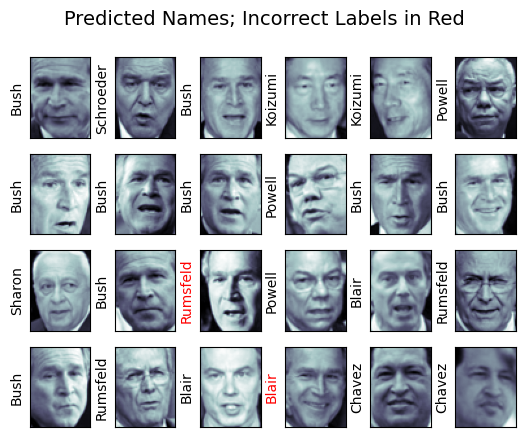

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

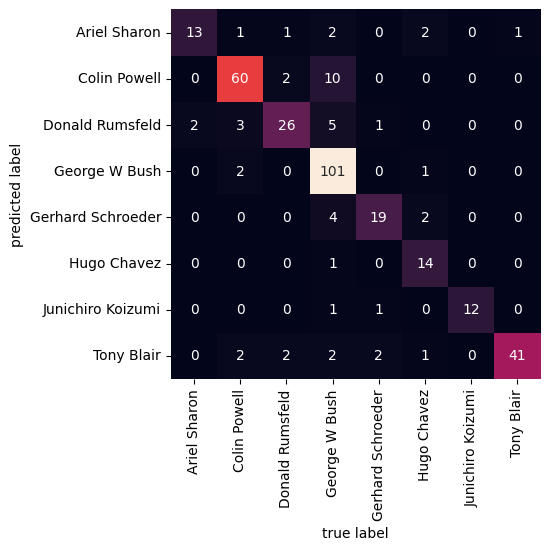

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **PRAKTIKUM 3**

### Klasifikasi Naive Bayes dengan Data Dummy

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

## Mendefiniskan Data Dummy

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[306 160]
 [115 138]
 [250 160]
 [ 21  89]
 [ 76  83]
 [198 209]
 [173  33]
 [ 93  72]
 [170 142]
 [194 187]
 [ 27  16]
 [221 196]
 [ 85  90]
 [ 71  74]
 [273 269]
 [ 14  28]
 [106  35]
 [111  56]
 [ 92 105]
 [ 79 214]
 [125   9]
 [109  42]
 [101  78]
 [ 86  38]
 [167 106]
 [133 108]
 [ 88   6]
 [ 85  83]
 [  2 109]
 [  1 138]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Parameter yang digunakan pada fungsi make_classification adalah,

- n_samples: jumlah sampel yang diinginkan

- n_features: jumlah fitur yang digunakan

- n_classes: jumlah kelas

- n_informative: jumlah fitur yang memiliki korelasi dengan kelas

- n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas

- n_repeated: jumlah fitur yang diulang

## (Opsional) Membuat Data Frame

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,306,160,0
1,115,138,0
2,250,160,0
3,21,89,0
4,76,83,0


Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,306,160,Kelas B
1,115,138,Kelas B
2,250,160,Kelas B
3,21,89,Kelas B
4,76,83,Kelas B


##
(Opsional) Visualisasi Data

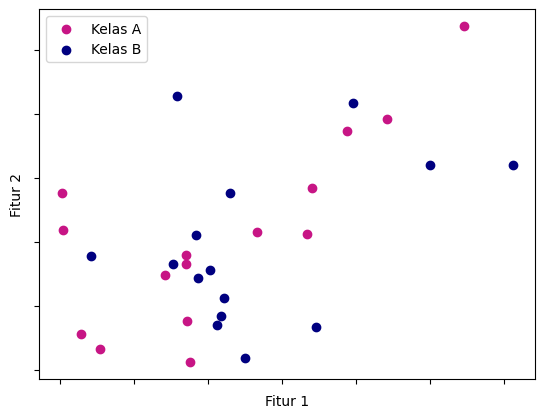

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## Klasifikasi Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.4444444444444444


## Klasifikasi Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.1111111111111111


# **PRAKTIKUM 4**

Klasifikasi Naive Bayes Pada Data Multinomial

Pada percobaan ini, kita akan menggunakan nilai multinomial untuk melakukan klasifikasi dengan Naive Bayes. Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.

Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya

## Load Data
Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Machine Learning SMT 5/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom v1 yang berupa label dan v2 yang berupa teks sms

## Pra Pengolahan Data
Beberapa hal yang akan dilakukan pada tahap ini yaitu,

1. Drop kolom yang tidak digunakan

2. Ubah nama kolom v1 (label) dan v2 (teks sms)

3. Inspeksi Data

4. Encode label

5. Memisahkan fitur dengan label

## Drop Kolom

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Ubah Nama Kolom V1 dan V2

In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Inspeksi Data

In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


## Encode Label

In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."



Memisahkan Fitur dengan Label

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

## Ekstraksi fitur

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


## Training dan Evaluasi Model
Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# **PRAKTIKUM 5**

### Klasifikasi Citra Siang dan Malam

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

## Langkah 0 - Import Library

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/Machine Learning SMT 5/images/training"
test_dir = "/content/drive/MyDrive/Machine Learning SMT 5/images/test"

## Langkah 1 - Load Data dan Visualisasikan

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 91, 106, 113],
         [ 91, 106, 113],
         [ 91, 106, 113],
         ...,
         [ 83, 109, 146],
         [ 82, 100, 140],
         [130, 145, 184]],
 
        [[ 91, 106, 113],
         [ 91, 106, 113],
         [ 91, 106, 113],
         ...,
         [ 83, 109, 146],
         [ 82, 100, 140],
         [130, 145, 184]],
 
        [[ 91, 106, 113],
         [ 91, 106, 113],
         [ 91, 106, 113],
         ...,
         [ 83, 109, 146],
         [ 82, 100, 140],
         [130, 145, 184]],
 
        ...,
 
        [[ 97, 104,  96],
         [ 97, 104,  96],
         [ 96, 103,  95],
         ...,
         [ 71,  68,  51],
         [ 76,  70,  54],
         [ 78,  72,  56]],
 
        [[102, 109, 101],
         [102, 109, 101],
         [102, 109, 101],
         ...,
         [ 68,  65,  48],
         [ 72,  66,  50],
         [ 74,  68,  52]],
 
        [[123, 130, 122],
         [123, 130, 122],
         [122, 129, 121],
         ...,
         [ 75,  72,  55],
  

Cek ukuran gambar secara acak

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 18
(889, 1280, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak

Shape	: (700, 1280, 3)
Label	: night


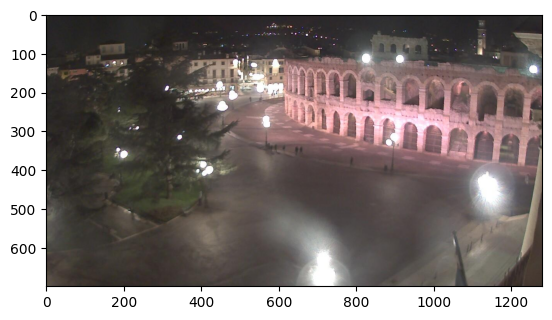

In [ ]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training.

In [ ]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 92
(600, 1100, 3)


**WARNING!** Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Shape	: (600, 1100, 3)
Label	: 0


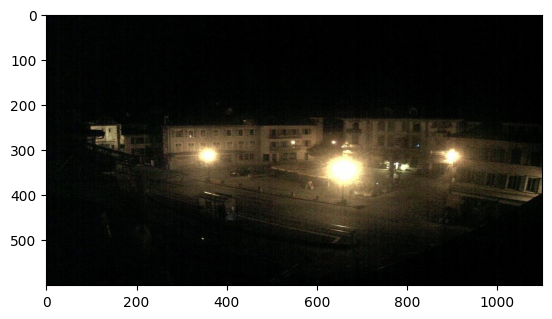

In [ ]:
random_img_viz(train_std_img_list)

## Langkah 4 - Ekstraksi Fitur

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. **INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!**

Image 232
Avg Brighness: 114.3860


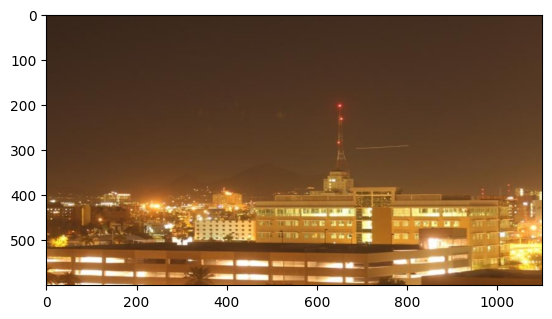

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Lakukan pengecekan prediksi secara acak pada data training

Image 148
Actual label: 0
Predicted label: 0


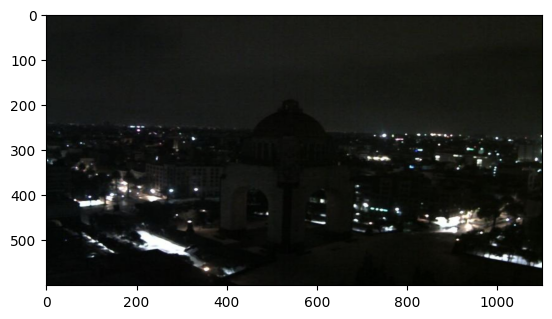

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi (Manual)

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep **confussion matrix**.

Buatlah fungsi berikut,

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


### Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

## Langkah 4 alternatif - Membuat Feature Vectors

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Cek hasilnya pada data training,

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,103.307636,1.0
1,129.001000,1.0
2,129.668229,1.0
3,127.998211,1.0
4,110.086635,1.0


Lakukan langkah yang serupa pada data testing

In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,132.523694,1.0
1,183.717738,1.0
2,157.918309,1.0
3,144.243461,1.0
4,191.571297,1.0


## Langkah 5 alternatif

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

## Langkah 6 alternatif

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# **Tugas 2**

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [ ]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

train_dir = "/content/drive/MyDrive/Machine Learning SMT 5/images/training"
test_dir = "/content/drive/MyDrive/Machine Learning SMT 5/images/test"

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

train_img = load_dataset(train_dir)

# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

random_img_viz(train_img)

In [ ]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))

    return std_img

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

train_std_img_list = preprocess(train_img)

random_img_viz(train_std_img_list)

In [ ]:
# Fungsi untuk mengekstrak fitur histogram dari gambar
def extract_histogram(image, bins=32):
    # Mengubah gambar ke dalam ruang warna HSV (berguna untuk ekstraksi fitur berbasis warna)
    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Menghitung histogram untuk setiap channel (H, S, V) dan menormalisasi
    hist_h = cv2.calcHist([hsv_img], [0], None, [bins], [0, 256])
    hist_s = cv2.calcHist([hsv_img], [1], None, [bins], [0, 256])
    hist_v = cv2.calcHist([hsv_img], [2], None, [bins], [0, 256])

    # Normalisasi histogram
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()

    # Menggabungkan histogram dari ketiga channel menjadi satu vektor fitur
    hist_features = np.concatenate([hist_h, hist_s, hist_v])

    return hist_features

# Fungsi untuk memproses daftar gambar dan mengekstrak fitur serta labelnya
def extract_features_and_labels(img_list, bins=32):
    features = []  # Menyimpan fitur dari gambar
    labels = []    # Menyimpan label dari gambar

    for item in img_list:
        image = item[0]
        label = item[1]

        # Ekstraksi fitur histogram dari gambar
        hist_features = extract_histogram(image, bins=bins)

        # Menambahkan fitur dan label ke daftar
        features.append(hist_features)
        labels.append(label)

    return np.array(features), np.array(labels)

# Ekstraksi fitur dan label untuk data latih
X_train, y_train = extract_features_and_labels(train_std_img_list)

# Memuat dataset pengujian
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)

# Ekstraksi fitur dan label untuk data uji
X_test, y_test = extract_features_and_labels(test_std_img_list)

# Import library SVM dan evaluasi
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur (agar distribusi data seimbang)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model SVM dengan kernel RBF dan parameter C=100
svm_model = SVC(kernel='rbf', C=100)
svm_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set data uji
y_pred = svm_model.predict(X_test_scaled)

# Evaluasi model dengan menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Menampilkan laporan klasifikasi (classification report)
report = classification_report(y_test, y_pred, target_names=['night', 'day'])
print("\nLaporan Klasifikasi:")
print(report)

# Fungsi untuk visualisasi gambar uji acak dengan prediksi
def random_test_img_viz(img_list, predictions):
    rand_num = np.random.randint(0, len(img_list))  # Memilih gambar secara acak

    img = img_list[rand_num][0]
    actual_label = img_list[rand_num][1]
    predicted_label = predictions[rand_num]

    actual_str = 'day' if actual_label == 1 else 'night'
    predicted_str = 'day' if predicted_label == 1 else 'night'

    plt.imshow(img)
    print(f'Label Asli\t: {actual_str}')
    print(f'Label Prediksi\t: {predicted_str}')

# Visualisasi gambar uji acak dengan prediksi
random_test_img_viz(test_std_img_list, y_pred)